In [119]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt


In [120]:
data = pd.read_csv("car_data.csv")

In [121]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [123]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [124]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [125]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [128]:
print(data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [127]:
print(data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [129]:
print(data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [130]:
fuel_type = data['Fuel_Type']
seller_type = data['Seller_Type']
transmission = data['Transmission']
selling_price = data['Selling_Price']

In [63]:
from matplotlib.pyplot import style

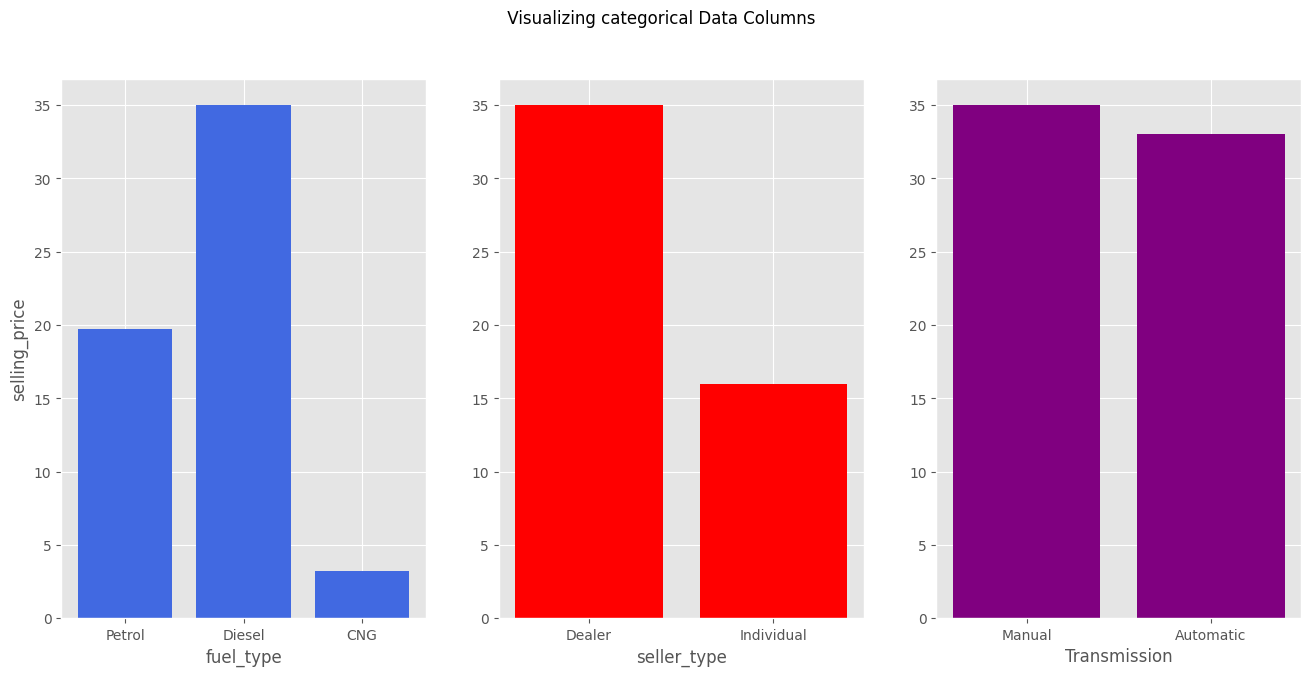

In [131]:
style.use('ggplot')
fig = plt.figure(figsize=(16,7))
fig.suptitle(" Visualizing categorical Data Columns ")
plt.subplot(1,3,1)
plt.bar(fuel_type , selling_price , color='royalblue')
plt.xlabel('fuel_type')
plt.ylabel('selling_price')
plt.subplot(1,3,2)
plt.bar(seller_type , selling_price ,color='red')
plt.xlabel('seller_type')
plt.subplot(1,3,3)
plt.bar(transmission , selling_price ,color='purple')
plt.xlabel('Transmission')
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

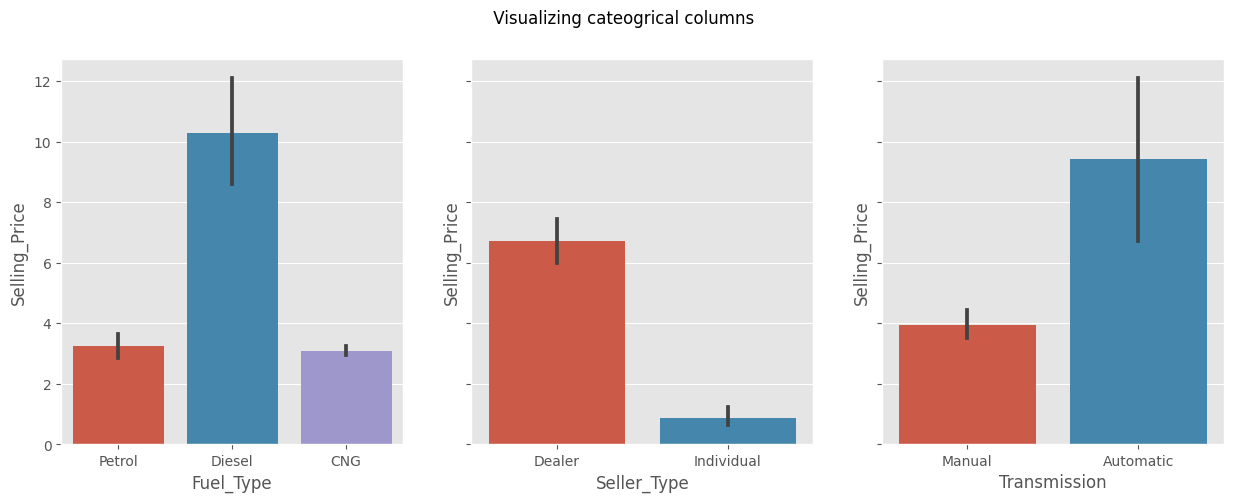

In [65]:
fig , axes = plt.subplots (1,3,figsize= (15,5), sharey = True)
fig.suptitle(" Visualizing cateogrical columns ")
sb.barplot(x=fuel_type, y=selling_price , ax=axes[0])
sb.barplot(x=seller_type, y=selling_price , ax=axes[1])
sb.barplot(x=transmission, y=selling_price , ax=axes[2])

In [132]:
petrol_data = data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [133]:
seller_data = data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [134]:
data.replace({'Fuel_Type' : {'Petrol': 0 ,'Diesel': 1 ,'CNG' : 2}} , inplace=True)
data =pd.get_dummies(data ,columns = ['Seller_Type','Transmission'], drop_first = True)



In [135]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


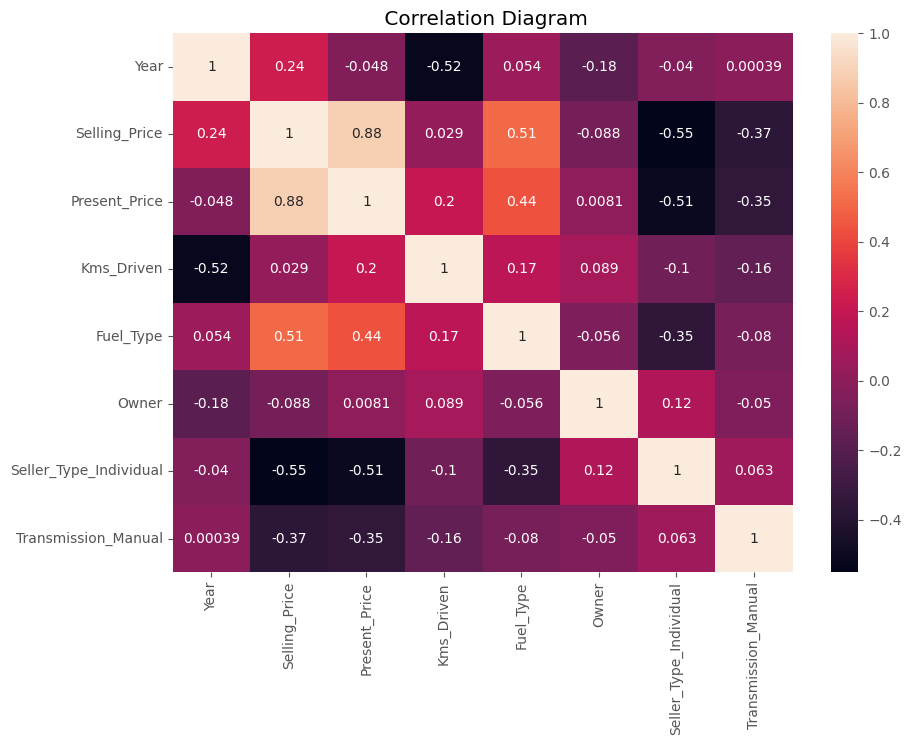

In [136]:
plt.figure(figsize=(10,7))
sb.heatmap(data.corr(), annot=True)
plt.title(" Correlation Diagram")
plt.show()

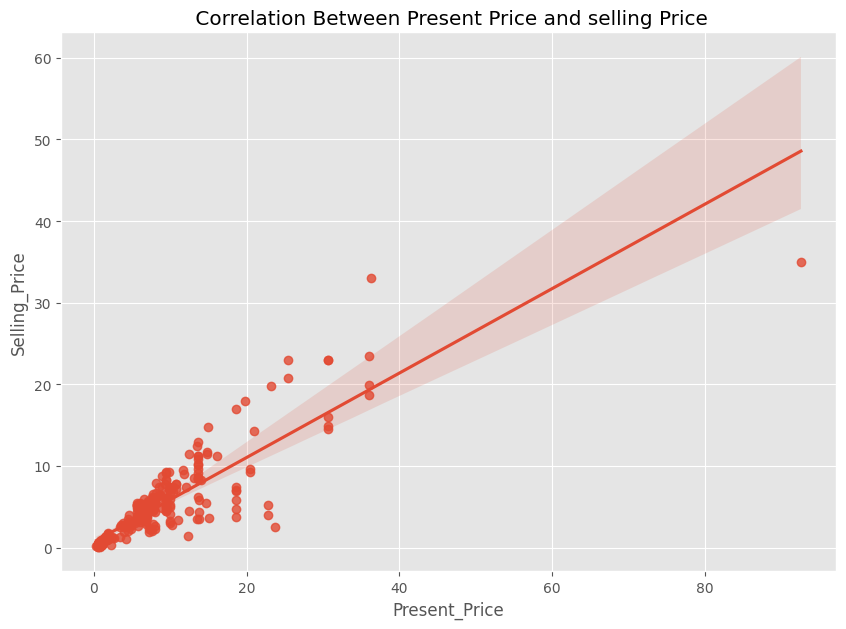

In [137]:
plt.figure(figsize=(10,7))
plt.title(" Correlation Between Present Price and selling Price")
sb.regplot(x='Present_Price', y='Selling_Price' , data=data)
plt.show()

In [138]:
x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [139]:
print('shape of X :',x.shape)
print('shape of y :',y.shape)

shape of X : (301, 7)
shape of y : (301,)


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.2 , random_state=42)

In [142]:
scaler = StandardScaler()

In [143]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


In [144]:
data.replace({'Seller_Type' : {'Dealer': 2 ,'Individual': 1}} , inplace=True)

In [145]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


In [146]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [147]:
model = LinearRegression()


In [148]:
model.fit(x_train , y_train)


LinearRegression()

In [149]:
pred = model.predict(x_test)

In [150]:
from sklearn.metrics import r2_score

In [152]:
print('Accuracy ' , r2_score (y_test , pred)*100)

Accuracy  84.68053957657425
